![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# German Traffic Sign Recognition
Multi-class, single-image classification

### Dataset
The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. They cordially invite researchers from relevant fields to participate: The competition is designed to allow for participation without special domain knowledge. Their benchmark has the following properties:

- Single-image, multi-class classification problem
- More than 40 classes
- More than 50,000 images in total
- Large, lifelike database

#### Notes
- You can check “Meta” folder for getting information about the classes.
- If the model is taking too much time to get trained then you can reduce the number of classes. There are around 43 classes in the dataset, model should be trained on a minimum of 15 classes.

### Initialize ImageDataGenerator (5 Marks)
- Rescale the images
- Specify value for validation_split & get 75% data in training and 25% data in validation

In [56]:
#Importing necessary libraries
import tensorflow as tf
import pandas as pd
import numpy as np

In [26]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [28]:
#Initializing path containing dataset
project_path = '/content/drive/My Drive/Data - German Traffic Sign Recognition.zip'

In [29]:
#Extracting data from zip file
from zipfile import ZipFile
with ZipFile(file = project_path, mode = 'r') as z:
  z.extractall()

In [45]:
#ImageDataGenerator declaration with 25% data as test (75% for training)
img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               horizontal_flip=True,
                                                               validation_split=0.25)

### Get training data from ImageDataGenerator (5 Marks)
- Give directory path
- Give target size
- Give batch_size
- Specify classes, if you wish to use less number of classes you need to give class names in a list (Atleast 15 classes should be there)
- Specify class_mode
- Specify color_mode
- Specify subset

You can get details here
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [43]:
#Setting directory path for training data
working_path = '/content/Data - German Traffic Sign Recognition/Data - German Traffic Sign Recognition'
import os
os.chdir(working_path)

In [123]:
#Define image parameters
img_size = 60
img_depth = 3
n_classes = 16
#Build training generator. 
train_generator = img_generator.flow_from_directory('Train',
                                                    target_size=(img_size, img_size),
                                                    classes = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'],
                                                    subset='training', 
                                                    class_mode = "categorical", color_mode = "rgb",
                                                    batch_size=64)

Found 11319 images belonging to 16 classes.


### Get validation data from ImageDataGenerator (5 Marks)
- Give directory path
- Give target size
- Give batch_size
- Specify classes, if you wish to use less number of classes you need to give class names in a list (Atleast 15 classes should be there)
- Specify class_mode
- Specify color_mode
- Specify subset

You can get details here
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [124]:
#Subsetting the validation data images from the training data
test_generator = img_generator.flow_from_directory('Train',
                                                    target_size=(img_size, img_size),
                                                    classes = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'],
                                                    subset='validation',
                                                    class_mode = "categorical", color_mode = "rgb",
                                                    batch_size=64)

Found 3770 images belonging to 16 classes.


In [125]:
#Lets check the features (images) and Labels (flower class) returned by ImageDataGenerator
X, y = next(train_generator)

print('Input features shape', X.shape)
print('Actual labels shape', y.shape)

Input features shape (64, 60, 60, 3)
Actual labels shape (64, 16)


Each batch of images contains 64 images, and each image has a resolution of 60x60x3

### Define model (5 Marks)
- Initialize a Sequential Model
- Add Convolution, Maxpool, Dropout, Flatten & Dense layers according to your model architecture

In [131]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize"sequential model
model = tf.keras.models.Sequential()

#normalizing data
model.Adding(tf.keras.layers.BatchNormalization(input_shape=(60,60,3,)))

#Adding first convolutional layer with no. of filters as 32 and a depth of 3x3
model.Adding(tf.keras.layers.Conv2D(32, 
                                 kernel_size=(3,3), 
                                 activation='relu'))
#Adding second convolutional layer with no. of filters as 128 and a depth of 3x3
model.Adding(tf.keras.layers.Conv2D(128,  
                                 kernel_size=(3,3),
                                 activation='relu'))
#Adding MaxPooling layer
model.Adding(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#normalizing data
model.Adding(tf.keras.layers.BatchNormalization())

#Adding third convolutional layer with no. of filters as 128 and a depth of 3x3
model.Adding(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
#Adding MaxPooling layer
model.Adding(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#normalizing data
model.Adding(tf.keras.layers.BatchNormalization())
#Dropout
model.Adding(tf.keras.layers.Dropout(0.25))

#Adding fourth convolutional layer with no. of filters as 128 and a depth of 3x3
model.Adding(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
#Adding MaxPooling layer
model.Adding(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#normalizing data
model.Adding(tf.keras.layers.BatchNormalization())
#Adding dropout layer
model.Adding(tf.keras.layers.Dropout(0.5))


#Flatten the output
model.Adding(tf.keras.layers.Flatten())
#Dense layer
model.Adding(tf.keras.layers.Dense(128, activation='relu'))
#Adding another dropout layer
model.Adding(tf.keras.layers.Dropout(0.25))
#Output layer
model.Adding(tf.keras.layers.Dense(n_classes, activation='softmax'))


### Compile the model (2 Marks)
- Specify optimizer, loss & metrics

In [132]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Get model summary (2 Marks)

In [133]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 60, 60, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 58, 58, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 128)       36992     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 128)       0

### Fit the model (3 Marks)
- Specify epochs
- Specify batch_size
- Give validation_data
- Validation accuracy should be more than 90%

In [134]:
#fitting the model on the train and test generators
history = model.fit(train_generator,
          epochs=15,
          steps_per_epoch= 11319//64,  #Number of training images//batch_size
          validation_data=test_generator,
          validation_steps = 3770//64
          ) #Number of test images//batch_size

Epoch 1/15
176/176 [==============================] - 23s 128ms/step - loss: 1.6761 - accuracy: 0.5104 - val_loss: 2.1304 - val_accuracy: 0.2705
Epoch 2/15
176/176 [==============================] - 22s 126ms/step - loss: 0.7078 - accuracy: 0.7505 - val_loss: 1.2747 - val_accuracy: 0.6638
Epoch 3/15
176/176 [==============================] - 22s 126ms/step - loss: 0.4721 - accuracy: 0.8285 - val_loss: 0.7110 - val_accuracy: 0.7802
Epoch 4/15
176/176 [==============================] - 22s 127ms/step - loss: 0.3889 - accuracy: 0.8566 - val_loss: 0.6084 - val_accuracy: 0.8182
Epoch 5/15
176/176 [==============================] - 22s 124ms/step - loss: 0.3126 - accuracy: 0.8881 - val_loss: 0.6772 - val_accuracy: 0.8006
Epoch 6/15
176/176 [==============================] - 22s 124ms/step - loss: 0.2667 - accuracy: 0.9080 - val_loss: 0.5675 - val_accuracy: 0.8332
Epoch 7/15
176/176 [==============================] - 22s 123ms/step - loss: 0.2159 - accuracy: 0.9241 - val_loss: 0.5158 - val_ac

**Final validation accuracy is around 92%**

### Draw plots (3 Marks)
- Plot training accuracy and validation accuracy with respect to epochs
- Plot training loss and validation loss with respect to epochs

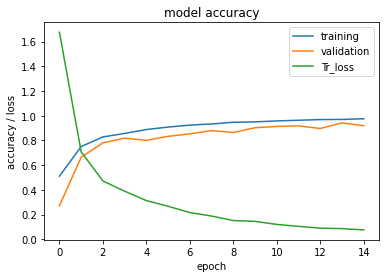

In [135]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation','Tr_loss'], loc='best')
plt.show()

The loss drops significantly in the first 4 epochs, and after which there is a gradual decline in loss. The model is able to hover around 92%-94% val-accuracy after 15 epochs, with the highest accuracy of 94% obtained in the 14th epoch.

-------